DBSCAN(Density-Based Spatial Clustering of Applications with Noise，具有噪声的基于密度的聚类方法)是一种很典型的密度聚类算法，和K-Means，BIRCH这些一般只适用于凸样本集的聚类相比，DBSCAN既可以适用于凸样本集，也可以适用于非凸样本集。

下面我们就对DBSCAN算法的原理做一个总结

# 1. 密度聚类原理


DBSCAN是一种基于密度的聚类算法，这类密度聚类算法一般假定类别可以通过样本分布的紧密程度决定。

同一类别的样本，他们之间的紧密相连的，也就是说，在该类别任意样本周围不远处一定有同类别的样本存在。

通过将紧密相连的样本划为一类，这样就得到了一个聚类类别。通过将所有各组紧密相连的样本划为各个不同的类别，则我们就得到了最终的所有聚类类别结果。

# 2. DBSCAN密度定义


在上一节我们定性描述了密度聚类的基本思想，本节我们就看看DBSCAN是如何描述密度聚类的。

DBSCAN是基于一组邻域来描述样本集的紧密程度的，参数$(ϵ, MinPts)$用来描述邻域的样本分布紧密程度。

其中，$ϵ$描述了某一样本的邻域距离阈值，MinPts描述了某一样本的距离为ϵ的邻域中样本个数的阈值。


假设我的样本集是$D=(x_1,x_2,...,x_m)$,则DBSCAN具体的密度描述定义如下：

　　　　1） ϵ-邻域：对于$x_j∈D$，其ϵ-邻域包含样本集D中与$x_j$的距离不大于ϵ的子样本集，即$N_ϵ(x_j)={x_i∈D|distance(x_i,x_j)≤ϵ}$, 这个子样本集的个数记为$|N_ϵ(x_j)|$

　　　　2) 核心对象：对于任一样本$x_j∈D$，如果其ϵ-邻域对应的$N_ϵ(x_j)$至少包含MinPts个样本，即如果$|N_ϵ(x_j)|≥MinPts$，则$x_j$是核心对象。　

　　　　3）密度直达：如果$x_i$位于$x_j$的ϵ-邻域中，且$x_j$是核心对象，则称$x_i$由$x_j$密度直达。注意反之不一定成立，即此时不能说$x_j$由$x_i$密度直达, 除非且$x_i$也是核心对象。

　　　　4）密度可达：对于$x_i$和$x_j$,如果存在样本样本序列$p_1,p_2,...,p_T$,满足$p_1=x_i,p_T=x_j$, 且$p_{t+1}$由$p_t$密度直达，则称$x_j$由$x_i$密度可达。也就是说，密度可达满足传递性。此时序列中的传递样本$p_1,p_2,...,p_{T−1}$均为核心对象，因为只有核心对象才能使其他样本密度直达。注意密度可达也不满足对称性，这个可以由密度直达的不对称性得出。

　　　　5）密度相连：对于$x_i$和$x_j$,如果存在核心对象样本$x_k$，使$x_i$和$x_j$均由$x_k$密度可达，则称$x_i$和$x_j$密度相连。注意密度相连关系是满足对称性的。

　　　　从下图可以很容易看出理解上述定义，图中MinPts=5，红色的点都是核心对象，因为其ϵ-邻域至少有5个样本。
    
    黑色的样本是非核心对象。所有核心对象密度直达的样本在以红色核心对象为中心的超球体内，如果不在超球体内，则不能密度直达。
    
    图中用绿色箭头连起来的核心对象组成了密度可达的样本序列。在这些密度可达的样本序列的ϵ-邻域内所有的样本相互都是密度相连的。
　　　　
![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/08bc80fb33edc81ad6ffb54d42fcf8b4.png)


# 3. DBSCAN密度聚类思想


DBSCAN的聚类定义很简单：**由密度可达关系导出的最大密度相连的样本集合，即为我们最终聚类的一个类别，或者说一个簇。**

这个DBSCAN的簇里面可以有一个或者多个核心对象。

如果只有一个核心对象，则簇里其他的非核心对象样本都在这个核心对象的ϵ-邻域里；

如果有多个核心对象，则簇里的任意一个核心对象的ϵ-邻域中一定有一个其他的核心对象，否则这两个核心对象无法密度可达。

这些核心对象的ϵ-邻域里所有的样本的集合组成的一个DBSCAN聚类簇。

　　　　那么怎么才能找到这样的簇样本集合呢？DBSCAN使用的方法很简单，它任意选择一个没有类别的核心对象作为种子，然后找到所有这个核心对象能够密度可达的样本集合，即为一个聚类簇。接着继续选择另一个没有类别的核心对象去寻找密度可达的样本集合，这样就得到另一个聚类簇。一直运行到所有核心对象都有类别为止。

　　　　基本上这就是DBSCAN算法的主要内容了，是不是很简单？但是我们还是有三个问题没有考虑。

　　　　第一个是一些异常样本点或者说少量游离于簇外的样本点，这些点不在任何一个核心对象在周围，在DBSCAN中，我们一般将这些样本点标记为噪音点。

　　　　第二个是距离的度量问题，即如何计算某样本和核心对象样本的距离。在DBSCAN中，一般采用最近邻思想，采用某一种距离度量来衡量样本距离，比如欧式距离。这和KNN分类算法的最近邻思想完全相同。对应少量的样本，寻找最近邻可以直接去计算所有样本的距离，如果样本量较大，则一般采用KD树或者球树来快速的搜索最近邻。也可以采用绝对值距离，或者采用每个维度分量距离。

　　　　第三种问题比较特殊，某些样本可能到两个核心对象的距离都小于ϵ，但是这两个核心对象由于不是密度直达，又不属于同一个聚类簇，那么如果界定这个样本的类别呢？一般来说，此时DBSCAN采用先来后到，先进行聚类的类别簇会标记这个样本为它的类别。也就是说BDSCAN的算法不是完全稳定的算法。


# 4. DBSCAN聚类算法


下面我们对DBSCAN聚类算法的流程做一个总结。

　　　　输入：样本集$D=(x_1,x_2,...,x_m)$，邻域参数$(ϵ,MinPts)$, 样本距离度量方式

　　　　输出： 簇划分C.　

　　　　1）初始化未分簇核心对象集合$Ω=∅$, 初始化聚类簇数k=0，初始化未访问样本集合$Γ = D$,  簇划分$C = ∅$
    
　　　　2) 对于j=1,2,...m, 按下面的步骤找出所有的核心对象：

　　　　　　a) 通过距离度量方式，找到样本$x_j$的ϵ-邻域子样本集$N_ϵ(x_j)$
      
　　　　　　b) 如果子样本集样本个数满足$|N_ϵ(x_j)|≥MinPts$， 将样本$x_j$加入未分簇核心对象样本集合：$Ω=Ω∪{x_j}$
　　　　　　
　　　　

       3）如果未分簇核心对象集合$Ω=∅$，则算法结束，否则转入步骤4.

　　　　4）在未分簇核心对象集合$Ω$中，随机选择一个核心对象$o$，初始化当前簇核心对象队列$Ω_{cur}={o}$, 初始化类别序号k=k+1，初始化当前簇样本集合$C_k={o}$, 更新未访问样本集合$Γ=Γ−{o}$
    
　　　　5）如果当前簇核心对象队列$Ω_{cur}=∅$，则当前聚类簇$C_k$生成完毕, 更新簇划分$C={C_1,C_2,...,C_k}$, 更新未分簇核心对象集合$Ω=Ω−C_k$， 转入步骤3。否则转化步骤6。

　　　　6）在当前簇核心对象队列$Ω_{cur}$中取出一个核心对象$o′$,通过邻域距离阈值ϵ找出所有的ϵ-邻域子样本集$N_ϵ(o′)$，令$Δ=N_ϵ(o′)∩Γ$,以及将剩余样本集中的邻域样本加入到当前簇。 更新当前簇样本集合$C_k=C_k∪Δ$, 更新未访问样本集合$Γ=Γ−Δ$,  更新$Ω_{cur}=Ω_{cur}∪(N_ϵ(o′)∩Ω)$，转入步骤5.

　　　　输出结果为： 簇划分$C={C_1,C_2,...,C_k}$

# 5. DBSCAN小结



和传统的K-Means算法相比，DBSCAN最大的不同就是不需要输入类别数k，当然它最大的优势是可以发现任意形状的聚类簇，而不是像K-Means，一般仅仅使用于凸的样本集聚类。

同时它在聚类的同时还可以找出异常点，这点和BIRCH算法类似。

　　　　那么我们什么时候需要用DBSCAN来聚类呢？一般来说，如果数据集是稠密的，并且数据集不是凸的，那么用DBSCAN会比K-Means聚类效果好很多。
    
    如果数据集不是稠密的，则不推荐用DBSCAN来聚类。

　　　　下面对DBSCAN算法的优缺点做一个总结。

　　　　DBSCAN的主要优点有：

　　　　1） 可以对任意形状的稠密数据集进行聚类，相对的，K-Means之类的聚类算法一般只适用于凸数据集。

　　　　2） 可以在聚类的同时发现异常点，对数据集中的异常点不敏感。

　　　　3） 聚类结果没有偏倚，相对的，K-Means之类的聚类算法初始值对聚类结果有很大影响。

　　　　DBSCAN的主要缺点有：

　　　　1）如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差，这时用DBSCAN聚类一般不适合。

　　　　2） 如果样本集较大时，聚类收敛时间较长，此时可以对搜索最近邻时建立的KD树或者球树进行规模限制来改进。

　　　　3） 调参相对于传统的K-Means之类的聚类算法稍复杂，主要需要对距离阈值ϵ，邻域样本数阈值MinPts联合调参，不同的参数组合对最后的聚类效果有较大影响。

案例
--
代码中需要的数据集文件[DBSCAN_data.txt](http://luanpeng.oss-cn-qingdao.aliyuncs.com/csdn/python/%E8%81%9A%E7%B1%BB/DBSCAN_data.txt)

python3.6下代码实现

In [1]:
!wget http://luanpeng.oss-cn-qingdao.aliyuncs.com/csdn/python/%E8%81%9A%E7%B1%BB/DBSCAN_data.txt

--2022-09-20 16:28:14--  http://luanpeng.oss-cn-qingdao.aliyuncs.com/csdn/python/%E8%81%9A%E7%B1%BB/DBSCAN_data.txt
Resolving luanpeng.oss-cn-qingdao.aliyuncs.com (luanpeng.oss-cn-qingdao.aliyuncs.com)... 47.104.37.237
Connecting to luanpeng.oss-cn-qingdao.aliyuncs.com (luanpeng.oss-cn-qingdao.aliyuncs.com)|47.104.37.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1466 (1.4K) [text/plain]
Saving to: ‘DBSCAN_data.txt’

DBSCAN_data.txt     100%[===================>]   1.43K  --.-KB/s    in 0s      

2022-09-20 16:28:14 (199 MB/s) - ‘DBSCAN_data.txt’ saved [1466/1466]



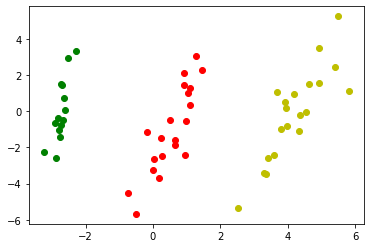

In [2]:
import pylab as pl
from collections import defaultdict,Counter

# 加载数据集
def loaddata(filepath):
    points = [[float(eachpoint.split(",")[0]), float(eachpoint.split(",")[1])] for eachpoint in open(filepath,"r")]
    return points

# 以距离最大的维度上的距离为两个对象之间的距离
def distance(point1,point2):
    return max(abs(point1[0] - point2[0]),abs(point1[1] - point2[1]))


# 计算每个数据点相邻的数据点，邻域定义为以该点为中心以边长为2*EPs的网格
def getSurroundPoint(points,Eps=1):
    surroundPoints = {}  # 每个元素默认是一个空列表
    for idx1,point1 in enumerate(points):
        for idx2,point2 in enumerate(points):
            if (idx1 < idx2):
                if(distance(point1,point2)<=Eps):
                    surroundPoints.setdefault(idx1,[])   # 设置每个点的默认值邻节点为空列表
                    surroundPoints.setdefault(idx2, [])   # 设置每个点的默认值邻节点为空列表
                    surroundPoints[idx1].append(idx2)
                    surroundPoints[idx2].append(idx1)
    return surroundPoints



# 定义邻域内相邻的数据点的个数大于4的为核心点，获取核心点以及核心点的周边点
def findallCore(points,surroundPoints,Eps=10,MinPts=5):
    # 获取所有核心点
    corePointIdx = [pointIdx for pointIdx,surPointIdxs in surroundPoints.items() if len(surPointIdxs)>=MinPts]
    # 邻域内包含某个核心点的非核心点，定义为边界点
    borderPointIdx = []
    for pointIdx,surPointIdxs in surroundPoints.items():
        if (pointIdx not in corePointIdx):  # 边界点本身不是核心点
            for onesurPointIdx in surPointIdxs:
                if onesurPointIdx in corePointIdx:  # 边界点周边至少包含一个核心点
                    borderPointIdx.append(pointIdx)
                    break

    corePoint = [points[pointIdx] for pointIdx in corePointIdx]  # 核心点
    borderPoint = [points[pointIdx] for pointIdx in borderPointIdx]  #边界点
    return corePointIdx,borderPointIdx

# 获取所有噪声点。噪音点既不是边界点也不是核心点
def findallnoise(points,corePointIdx,borderPointIdx):
    noisePointIdx = [pointIdx for pointIdx in range(len(points)) if pointIdx not in corePointIdx and pointIdx not in borderPointIdx]
    noisePoint = [points[pointIdx] for pointIdx in noisePointIdx]
    return noisePoint




# 根据邻域关系，核心点，边界点进行分簇
def divideGroups(points,surroundPoints,corePointIdx,borderPointIdx):
    groups = [idx for idx in range(len(points))]  # groups记录每个节点所属的簇编号
    # 各个核心点与其邻域内的所有核心点放在同一个簇中
    for pointidx,surroundIdxs in surroundPoints.items():
        for oneSurroundIdx in surroundIdxs:
            if (pointidx in corePointIdx and oneSurroundIdx in corePointIdx and pointidx < oneSurroundIdx):
                for idx in range(len(groups)):
                    if groups[idx] == groups[oneSurroundIdx]:
                        groups[idx] = groups[pointidx]

    # 边界点跟其邻域内的某个核心点放在同一个簇中
    for pointidx,surroundIdxs in surroundPoints.items():
        for oneSurroundIdx in surroundIdxs:
            if (pointidx in borderPointIdx and oneSurroundIdx in corePointIdx):
                groups[pointidx] = groups[oneSurroundIdx]
                break
    return groups

# 绘制分簇图
def plotgroup(points,groups,noisePoint):
    # 取簇规模最大的3个簇
    finalGroup = Counter(groups).most_common(3)
    finalGroup = [onecount[0] for onecount in finalGroup]
    group1 = [points[idx] for idx in range(len(points)) if groups[idx]==finalGroup[0]]
    group2 = [points[idx] for idx in range(len(points)) if groups[idx]==finalGroup[1]]
    group3 = [points[idx] for idx in range(len(points)) if groups[idx]==finalGroup[2]]
    pl.plot([eachpoint[0] for eachpoint in group1], [eachpoint[1] for eachpoint in group1], 'or')
    pl.plot([eachpoint[0] for eachpoint in group2], [eachpoint[1] for eachpoint in group2], 'oy')
    pl.plot([eachpoint[0] for eachpoint in group3], [eachpoint[1] for eachpoint in group3], 'og')
    # 打印噪音点，黑色
    pl.plot([eachpoint[0] for eachpoint in noisePoint], [eachpoint[1] for eachpoint in noisePoint], 'ok')
    pl.show()


if __name__=='__main__':
    points = loaddata('DBSCAN_data.txt')   # 加载数据
    surroundPoints=getSurroundPoint(points,Eps=2)  # 获取邻域关系
    corePointIdx, borderPointIdx = findallCore(points,surroundPoints,Eps=2,MinPts=3)  # 获取核心节点和边界节点
    noisePoint = findallnoise(points,corePointIdx,borderPointIdx)  # 获取噪音节点
    groups = divideGroups(points,surroundPoints,corePointIdx,borderPointIdx)   # 节点分簇
    plotgroup(points, groups, noisePoint)  # 可视化绘图